In [ ]:
import matplotlib.pyplot as plt
import numpy as np

## plot utilites

In [ ]:
def plot_series(time, series, format="-", start=0, end=None, label=None):
    """
    Plot time series data.

    Args:
        time (array-like): Array containing the time steps.
        series (array-like): Array containing the measurements for each time step.
        format (str): Line style when plotting the graph.
        start (int): Index of the first time step to plot.
        end (int): Index of the last time step to plot.
        label (str or list): Label(s) for the plotted series.
    """
    # Setup dimensions of the graph figure
    plt.figure(figsize=(10, 6))

    # Plot the time series data
    plt.plot(time[start:end], series[start:end], format, label=label)

    # Label the x-axis
    plt.xlabel("Time")

    # Label the y-axis
    plt.ylabel("Value")

    # Add legend if labels are provided
    if label:
        plt.legend(fontsize=14)

    # Overlay a grid
    plt.grid(True)

    # Draw the graph on screen
    plt.show()

## trends

In [ ]:
def trend(time, slope=0):
    """
    Compute a linear series given the slope.

    Args:
        time (array-like): Array containing the time steps.
        slope (float): Slope of the linear series.

    Returns:
        array-like: Linear series computed based on the given slope.
    """
    # Compute the linear series given the slope
    series = slope * time
    return series


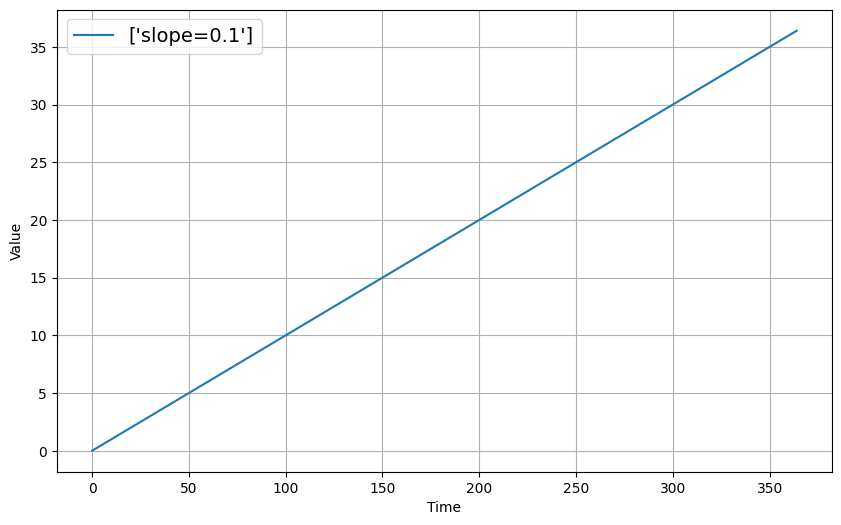

In [ ]:
# Generate time steps (365 days)
time = np.arange(365)

# Define slope
slope = 0.1

# Generate the linear series (trend)
series = trend(time, slope)

# Plot the series
plot_series(time, series, label=[f'slope={slope}'])


## seasonal pattern

In [ ]:
import numpy as np

def seasonal_pattern(season_time):
    # Compute the seasonal pattern
    data_pattern = np.where(season_time < 0.4,
                            np.cos(season_time * 2 * np.pi),
                            1 / np.exp(3 * season_time))
    return data_pattern

def seasonality(time, period, amplitude=1, phase=0):
    # Compute the seasonal time
    seasonal_time = ((time + phase) % period) / period
    # Compute the data pattern with amplitude and the computed seasonal pattern
    data_pattern = amplitude * seasonal_pattern(seasonal_time)
    return data_pattern


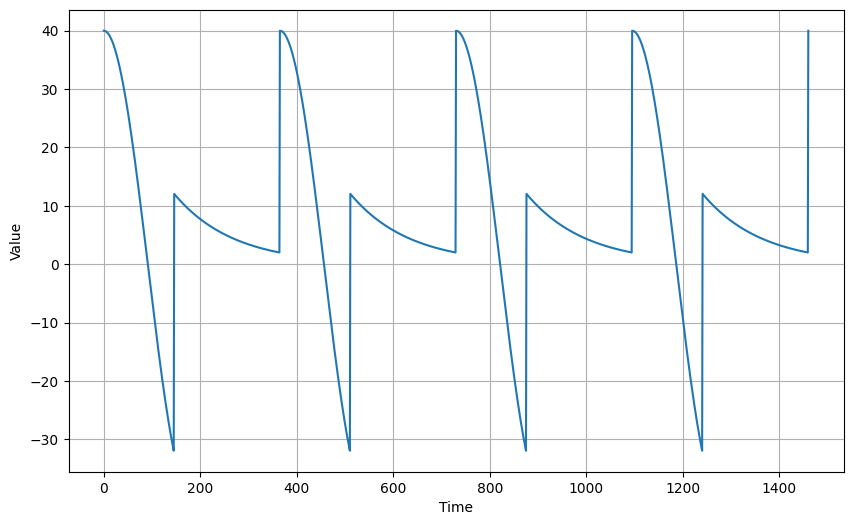

In [ ]:
# Generate time steps (4 years + 1 day)
time = np.arange(4 * 365 + 1)
period = 365
amplitude = 40

# Generate the time series data with seasonality
series = seasonality(time, period=period, amplitude=amplitude)

# Plot the series
plot_series(time, series)


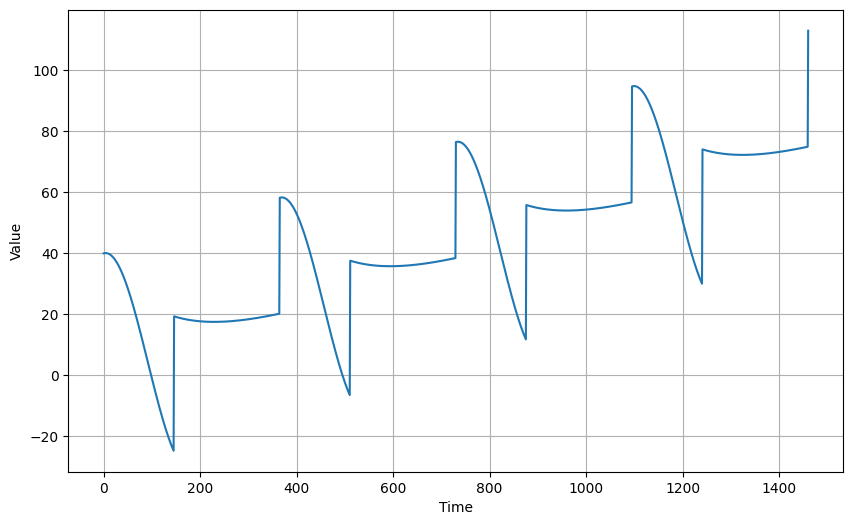

In [ ]:
   # Define seasonal parameters
slope = 0.05
period = 365
amplitude = 40

# Generate the data
series = trend(time,slope)+seasonality(time, period=period, amplitude=amplitude)

# Plot the results
plot_series(time, series)


In [ ]:
import numpy as np

def noise(time, noise_level=1, seed=None):
    """
    Generate random noise for a given time series.

    Args:
        time (array-like): Array containing the time steps.
        noise_level (float): Amplitude of the noise.
        seed (int or None): Seed for the random number generator.

    Returns:
        array-like: Random noise array.
    """
    # Initialize a random number generator with the given seed
    rnd = np.random.RandomState(seed)
    # Generate random noise with a normal distribution and scale it by noise_level
    noise = rnd.randn(len(time)) * noise_level
    return noise


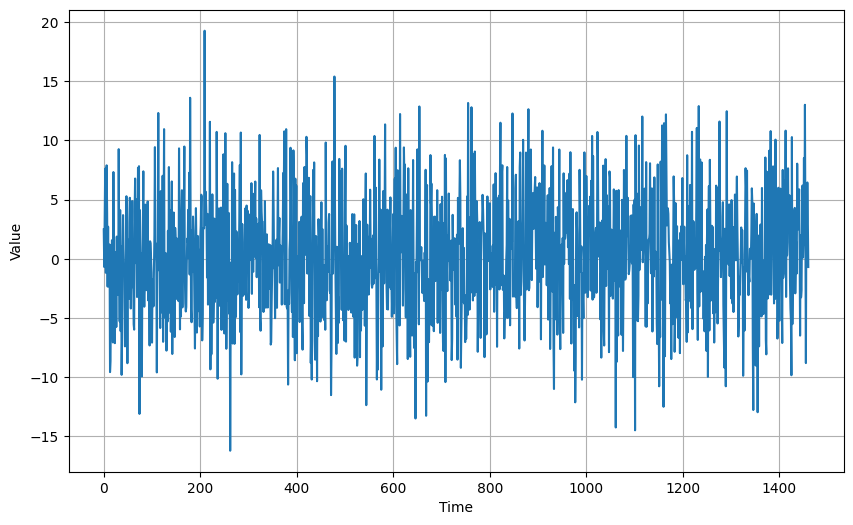

In [ ]:
# Define noise level
noise_level = 5

# Generate noise signal
noise_signal = noise(time, noise_level=noise_level, seed=42)

# Plot the noise signal
plot_series(time, noise_signal)


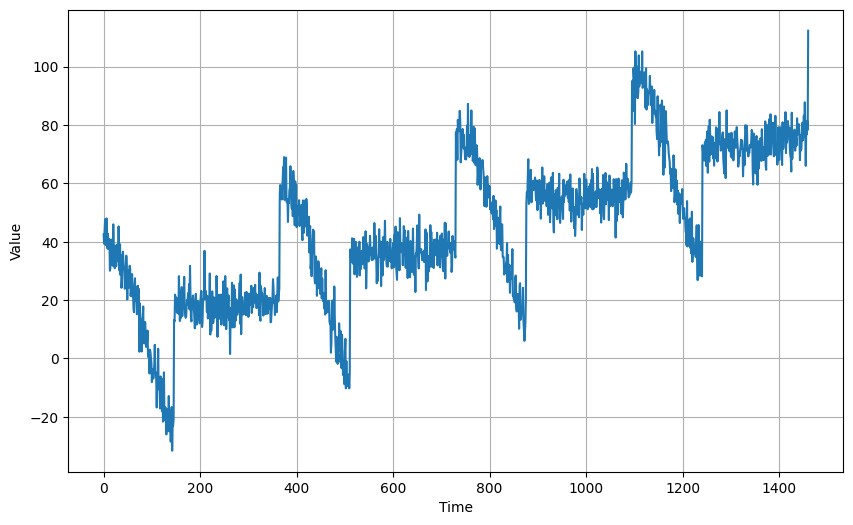

In [ ]:
# Add noise signal to the series
series += noise_signal

# Plot the combined series
plot_series(time, series)


In [ ]:
def autocorrelation(time, amplitude, seed=None):
    """
    Generate a time series with autocorrelation.

    Args:
        time (array-like): Array containing the time steps.
        amplitude (float): Amplitude of the autocorrelation.
        seed (int or None): Seed for the random number generator.

    Returns:
        array-like: Time series with autocorrelation.
    """
    rnd = np.random.RandomState(seed)

    # Initialize array for the time series with added buffer
    ar = rnd.randn(len(time) + 50)
    ar[:50] = 100  # Set the initial values to 100

    phi1 = 0.5
    phi2 = -0.1

    for step in range(50, len(time) + 50):
        # Update each step of the series with autocorrelation
        ar[step] += phi1 * ar[step - 50]
        ar[step] += phi2 * ar[step - 33]

    # Trim the buffer and scale the series by the amplitude
    ar = ar[50:] * amplitude

    return ar


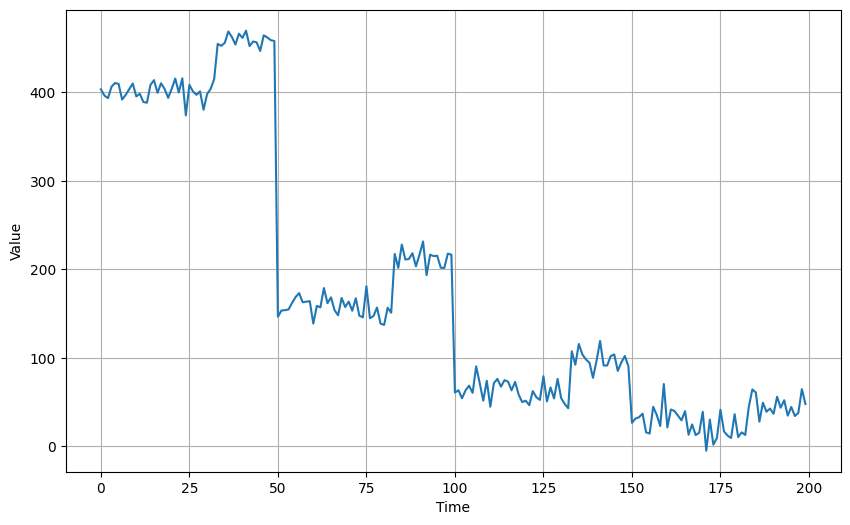

In [ ]:
# Generate the autocorrelated series
series = autocorrelation(time, amplitude=10, seed=42)

# Plot the first 200 data points of the series
plot_series(time[:200], series[:200])


In [ ]:
def autocorrelation(time, amplitude, seed=None):
    """
    Generate a time series with autocorrelation.

    Args:
        time (array-like): Array containing the time steps.
        amplitude (float): Amplitude of the autocorrelation.
        seed (int or None): Seed for the random number generator.

    Returns:
        array-like: Time series with autocorrelation.
    """
    rnd = np.random.RandomState(seed)

    # Initialize array for the time series with added buffer
    ar = rnd.randn(len(time) + 1)

    phi = 0.8

    # Iterate over each time step to apply autocorrelation
    for step in range(1, len(time) + 1):
        # Update each step of the series with autocorrelation
        ar[step] += phi * ar[step - 1]

    # Trim the buffer and scale the series by the amplitude
    ar = ar[1:] * amplitude

    return ar

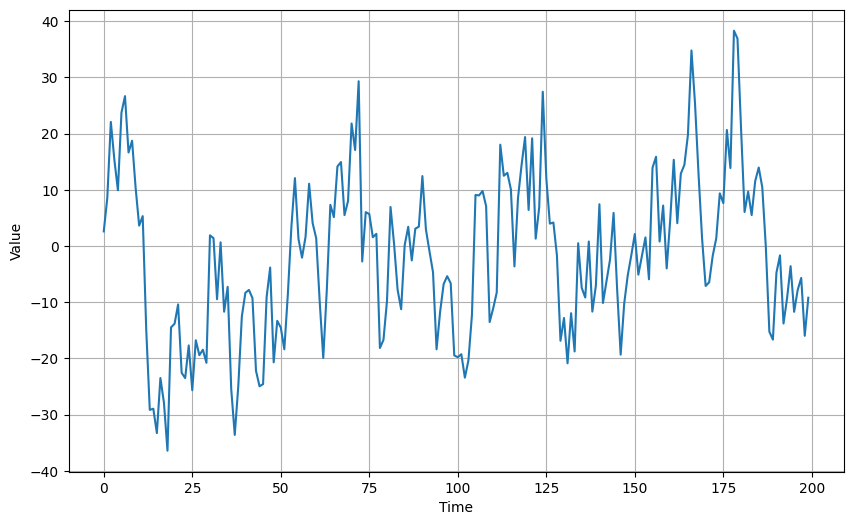

In [ ]:
# Generate the autocorrelated series
series = autocorrelation(time, amplitude=10, seed=42)

# Plot the first 200 data points of the series
plot_series(time[:200], series[:200])
